In [10]:
!pip install scipy

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv("/content/epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

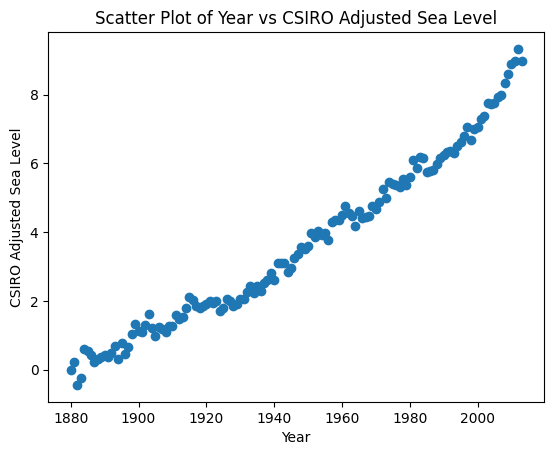

In [3]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Scatter Plot of Year vs CSIRO Adjusted Sea Level')
plt.show()

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [12]:
line_fit = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
line_fit

LinregressResult(slope=np.float64(0.0630445840121348), intercept=np.float64(-119.06594196773978), rvalue=np.float64(0.984757131182585), pvalue=np.float64(3.7886969791131554e-102), stderr=np.float64(0.000969211871328715), intercept_stderr=np.float64(1.8869433812425225))

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [13]:
mask = df["Year"] >= 2000
line_fit_recent = linregress(df[mask]["Year"], df[mask]["CSIRO Adjusted Sea Level"])

In [14]:
line_fit_recent

LinregressResult(slope=np.float64(0.1664272733318682), intercept=np.float64(-325.7934668059649), rvalue=np.float64(0.9762875716140618), pvalue=np.float64(2.4388064141618245e-09), stderr=np.float64(0.010652933111541163), intercept_stderr=np.float64(21.375153425608215))

The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

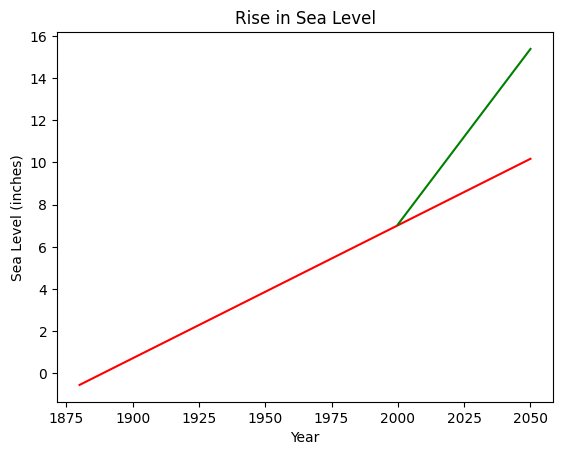

<Figure size 640x480 with 0 Axes>

In [16]:
# Add labels and title
plt.plot(range(1880, 2051, 1), line_fit.slope*range(1880, 2051, 1)+line_fit.intercept, color="red")
plt.plot(range(2000, 2051, 1), line_fit_recent.slope*range(2000, 2051, 1)+line_fit_recent.intercept, color='green')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.show()
plt.savefig('sea_level_plot.png')

##combine

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


df = pd.read_csv("/content/epa-sea-level.csv")

def draw_plot():
  plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
  plt.xlabel('Year')
  plt.ylabel('CSIRO Adjusted Sea Level')
  plt.title('Scatter Plot of Year vs CSIRO Adjusted Sea Level')
  plt.show()

  line_fit = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
  mask = df["Year"] >= 2000
  line_fit_recent = linregress(df[mask]["Year"], df[mask]["CSIRO Adjusted Sea Level"])

  # Add labels and title
  plt.plot(range(1880, 2051, 1), line_fit.slope*range(1880, 2051, 1)+line_fit.intercept, color="red")
  plt.plot(range(2000, 2051, 1), line_fit_recent.slope*range(2000, 2051, 1)+line_fit_recent.intercept, color='green')
  plt.xlabel("Year")
  plt.ylabel("Sea Level (inches)")
  plt.title("Rise in Sea Level")
  plt.show()
  plt.savefig('sea_level_plot.png')

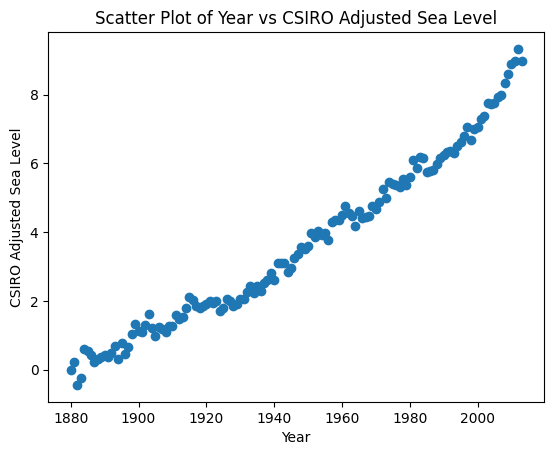

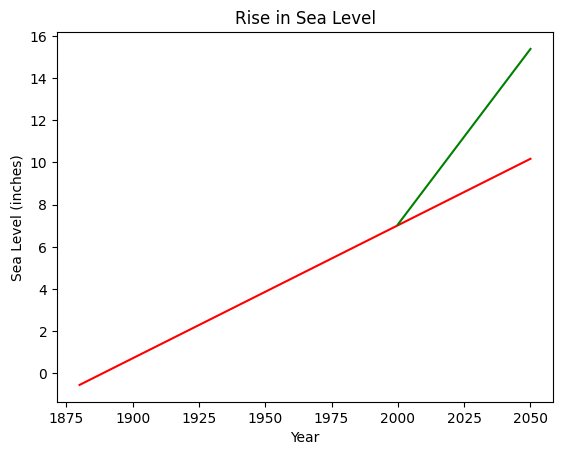

<Figure size 640x480 with 0 Axes>

In [18]:
draw_plot()